dataset

In [1]:
import pandas as pd
file_path = 'dataset_sdn.csv'
dataset = pd.read_csv(file_path)

dataset.head()


dt  switch       src       dst  pktcount  bytecount  dur   dur_nsec  \
0  11425       1  10.0.0.1  10.0.0.8     45304   48294064  100  716000000   
1  11605       1  10.0.0.1  10.0.0.8    126395  134737070  280  734000000   
2  11425       1  10.0.0.2  10.0.0.8     90333   96294978  200  744000000   
3  11425       1  10.0.0.2  10.0.0.8     90333   96294978  200  744000000   
4  11425       1  10.0.0.2  10.0.0.8     90333   96294978  200  744000000   

        tot_dur  flows  ...  pktrate  Pairflow  Protocol  port_no   tx_bytes  \
0  1.010000e+11      3  ...      451         0       UDP        3  143928631   
1  2.810000e+11      2  ...      451         0       UDP        4       3842   
2  2.010000e+11      3  ...      451         0       UDP        1       3795   
3  2.010000e+11      3  ...      451         0       UDP        2       3688   
4  2.010000e+11      3  ...      451         0       UDP        3       3413   

  rx_bytes  tx_kbps  rx_kbps  tot_kbps  label  
0     3917        0      0.0       0.0      0  
1     3520        0      0.0       0.0      0  
2     1242        0      0.0       0.0      0  
3     1492        0      0.0       0.0      0  
4     3665        0      0.0       0.0      0  

[5 rows x 23 columns]

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.feature_selection import SelectKBest, mutual_info_classif
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer
import pandas as pd
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing

from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
import time

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics


preprocess

In [3]:
df = dataset.copy()

In [4]:
print(df['pktrate'].value_counts)

<bound method IndexOpsMixin.value_counts of 0         451
1         451
2         451
3         451
4         451
         ... 
104340      0
104341      0
104342      1
104343      1
104344      1
Name: pktrate, Length: 104345, dtype: int64>


In [5]:
print(df['byteperflow'].value_counts)

<bound method IndexOpsMixin.value_counts of 0         14428310
1         14424046
2         14427244
3         14427244
4         14427244
            ...   
104340        2842
104341        2842
104342        2940
104343        2940
104344        2940
Name: byteperflow, Length: 104345, dtype: int64>


In [6]:
print(df['pktperflow'].value_counts)


<bound method IndexOpsMixin.value_counts of 0         13535
1         13531
2         13534
3         13534
4         13534
          ...  
104340       29
104341       29
104342       30
104343       30
104344       30
Name: pktperflow, Length: 104345, dtype: int64>


In [7]:
df = df.drop(columns=["pktrate", "byteperflow", "pktperflow"])

df['src'] = df['src'].astype('category').cat.codes
df['dst'] = df['dst'].astype('category').cat.codes
df['Protocol'] = df['Protocol'].astype('category').cat.codes

# df = pd.get_dummies(df, columns=['src', 'dst', 'Protocol'])



<Axes: >

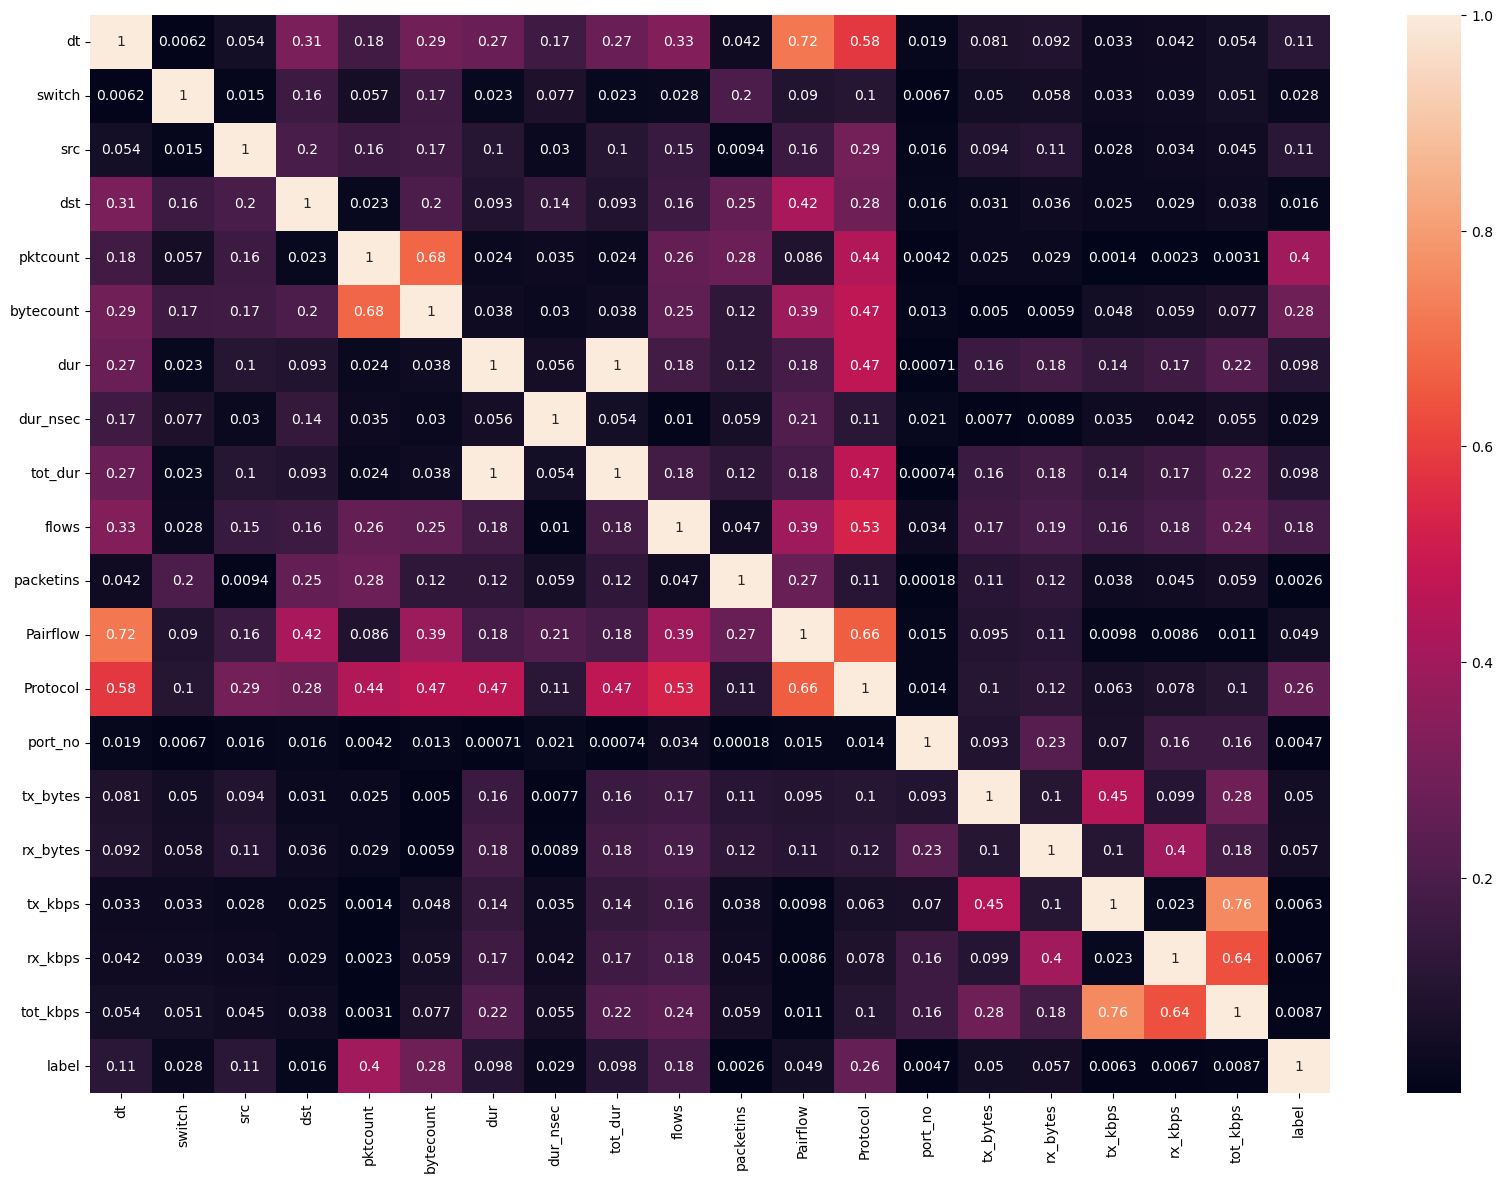

In [8]:
fig, ax = plt.subplots(figsize=(20,14)) 
sns.heatmap(abs(df.corr()), annot=True)

In [9]:
df = df.drop(columns=['dt'])
# df = df.drop(columns=['dur'])

<Axes: >

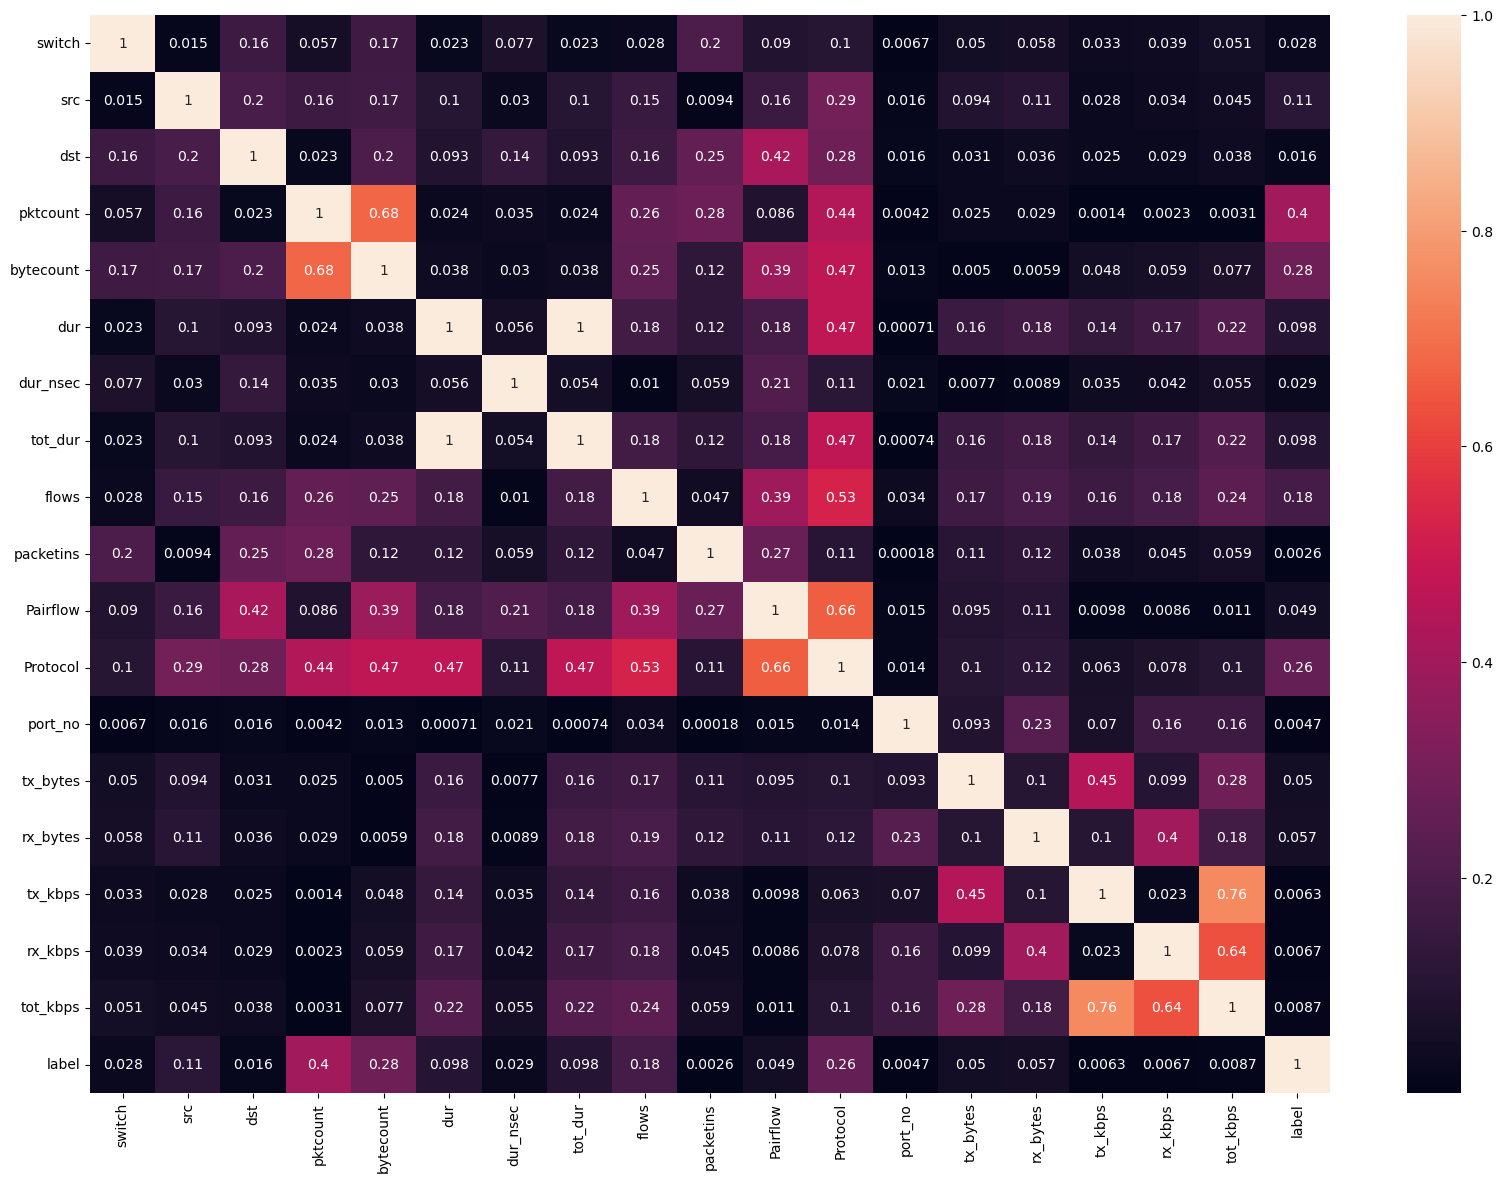

In [10]:
fig, ax = plt.subplots(figsize=(20,14)) 
sns.heatmap(abs(df.corr()), annot=True)


removing nan values

<Axes: >

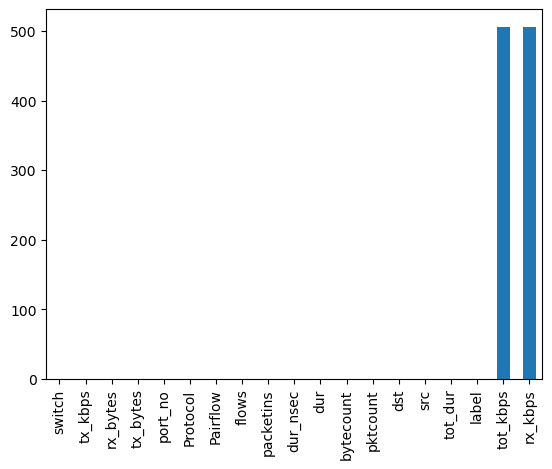

In [11]:
df[df.columns[df.isna().sum() >= 0]].isna().sum().sort_values().plot.bar()

In [12]:
df.isnull().sum()

switch         0
src            0
dst            0
pktcount       0
bytecount      0
dur            0
dur_nsec       0
tot_dur        0
flows          0
packetins      0
Pairflow       0
Protocol       0
port_no        0
tx_bytes       0
rx_bytes       0
tx_kbps        0
rx_kbps      506
tot_kbps     506
label          0
dtype: int64

In [13]:
df['rx_kbps'].value_counts()


rx_kbps
0.0       53834
1.0        5458
2.0        2987
3.0        2082
3838.0     1363
          ...  
2336.0        1
1122.0        1
6419.0        1
2424.0        1
2100.0        1
Name: count, Length: 1730, dtype: int64

In [14]:
df['tot_kbps'].value_counts()

tot_kbps
0.0       45137
2.0        4806
4.0        2578
3838.0     2005
6.0        1843
          ...  
8353.0        1
14.0          1
1704.0        1
2101.0        1
773.0         1
Name: count, Length: 2259, dtype: int64

In [15]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

print(df.isnull().sum())

switch       0
src          0
dst          0
pktcount     0
bytecount    0
dur          0
dur_nsec     0
tot_dur      0
flows        0
packetins    0
Pairflow     0
Protocol     0
port_no      0
tx_bytes     0
rx_bytes     0
tx_kbps      0
rx_kbps      0
tot_kbps     0
label        0
dtype: int64


In [16]:
X = df.drop(['label'], axis=1)
y = df.label

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

def knn(X_train, y_train, X_test, y_test):
    # k = 1, Euclidean distance
    knn = KNeighborsClassifier(
        n_neighbors=1, 
        metric='euclidean'
    )

    knn.fit(X_train, y_train)
    y_pred_knn = knn.predict(X_test)

    accuracy_knn = accuracy_score(y_test, y_pred_knn)
    print(f"kNN Accuracy (k=1, Euclidean): {accuracy_knn*100:.2f}%")

    # Confusion Matrix
    cm_knn = confusion_matrix(y_test, y_pred_knn)
    print("kNN Confusion Matrix:")
    print(cm_knn)

    # Sensitivity, Specificity, Precision, F1-Score
    tn, fp, fn, tp = cm_knn.ravel()
    Se = tp / (tp + fn) * 100  # Sensitivity
    Sp = tn / (tn + fp) * 100  # Specificity
    Pr = tp / (tp + fp) * 100  # Precision
    Fsc = 2 * (Pr * Se) / (Pr + Se)  # F1-Score

    print(f"Sensitivity (Se): {Se:.2f}%")
    print(f"Specificity (Sp): {Sp:.2f}%")
    print(f"Precision (Pr): {Pr:.2f}%")
    print(f"F1-Score (Fsc): {Fsc:.2f}%")

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_knn)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

    return knn, accuracy_knn, cm_knn, Se, Sp, Pr, Fsc

In [7]:
def dt(X_train, y_train, X_test, y_test):
    # Criterion = 'gini'
    dt = DecisionTreeClassifier(
        criterion='gini', 
        random_state=42
    )

    dt.fit(X_train, y_train)
    y_pred_dt = dt.predict(X_test)

    accuracy_dt = accuracy_score(y_test, y_pred_dt)
    print(f"Decision Tree Accuracy (Gini): {accuracy_dt*100:.2f}%")

    # Confusion Matrix
    cm_dt = confusion_matrix(y_test, y_pred_dt)

    # Sensitivity, Specificity, Precision, F1-Score
    tn, fp, fn, tp = cm_dt.ravel()
    Se = tp / (tp + fn) * 100  # Sensitivity
    Sp = tn / (tn + fp) * 100  # Specificity
    Pr = tp / (tp + fp) * 100  # Precision
    Fsc = 2 * (Pr * Se) / (Pr + Se)  # F1-Score

    print(f"Sensitivity (Se): {Se:.2f}%")
    print(f"Specificity (Sp): {Sp:.2f}%")
    print(f"Precision (Pr): {Pr:.2f}%")
    print(f"F1-Score (Fsc): {Fsc:.2f}%")
    
    fpr, tpr, _ = roc_curve(y_test, y_pred_dt)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

    return dt, accuracy_dt, cm_dt, Se, Sp, Pr, Fsc

In [20]:
def svm(X_train, y_train, X_test, y_test):
    
    # BoxConstraint = 1 => C = 1 in sklearn
    # kernel scale = 0.9 => gamma = 1/(2*(0.9^2)) 
    gamma_value = 1.0 / (2.0 * (0.9**2))
    
    svm = SVC(
        kernel='rbf', 
        C=1.0, 
        gamma=gamma_value, 
        random_state=42
    )
    print("starting")
    svm.fit(X_train, y_train)
    y_pred_svm = svm.predict(X_test)
    
    accuracy_svm = accuracy_score(y_test, y_pred_svm)
    print(f"SVM Accuracy (RBF, BoxConstraint=1, KernelScale=0.9): {accuracy_svm*100:.2f}%")
    
    # print("SVM Confusion Matrix:")
    cm = confusion_matrix(y_test, y_pred_svm)
    # print(cm)
    # Sensitivity, Specificity, Precision, F1-Score
    tn, fp, fn, tp = cm.ravel()
    Se = tp / (tp + fn) * 100  # Sensitivity
    Sp = tn / (tn + fp) * 100  # Specificity
    Pr = tp / (tp + fp) * 100  # Precision
    Fsc = 2 * (Pr * Se) / (Pr + Se)  # F1-Score

    print(f"Sensitivity (Se): {Se:.2f}%")
    print(f"Specificity (Sp): {Sp:.2f}%")
    print(f"Precision (Pr): {Pr:.2f}%")
    print(f"F1-Score (Fsc): {Fsc:.2f}%")
    
    fpr, tpr, _ = roc_curve(y_test, y_pred_svm)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

    return svm, accuracy_svm, cm, Se, Sp, Pr, Fsc



knn

kNN Accuracy (k=1, Euclidean): 95.46%
kNN Confusion Matrix:
[[18427   685]
 [  736 11456]]
Sensitivity (Se): 93.96%
Specificity (Sp): 96.42%
Precision (Pr): 94.36%
F1-Score (Fsc): 94.16%


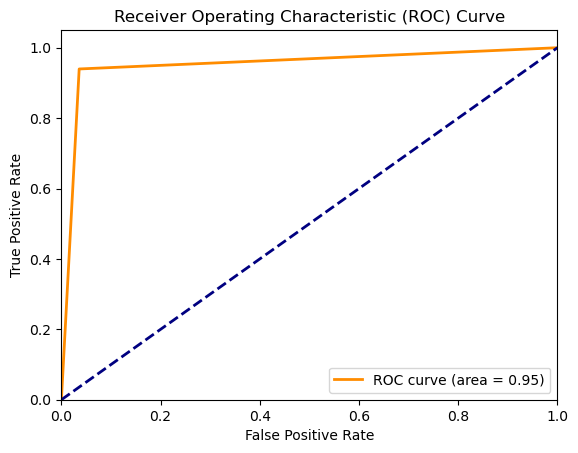

In [21]:
knn_model, knn_accuracy, knn_cm, knn_sensitivity, knn_specificity, knn_precision, knn_f1_score = knn(X_train, y_train, X_test, y_test)


dt

Decision Tree Accuracy (Gini): 99.73%
Sensitivity (Se): 99.76%
Specificity (Sp): 99.71%
Precision (Pr): 99.54%
F1-Score (Fsc): 99.65%


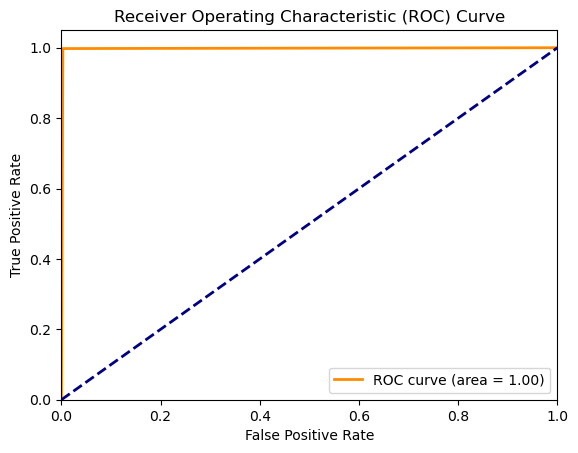

In [22]:
dt_model, dt_accuracy, dt_cm, dt_sensitivity, dt_specificity, dt_precision, dt_f1_score = dt(X_train, y_train, X_test, y_test)

svm

starting
SVM Accuracy (RBF, BoxConstraint=1, KernelScale=0.9): 96.70%
Sensitivity (Se): 95.37%
Specificity (Sp): 97.55%
Precision (Pr): 96.13%
F1-Score (Fsc): 95.75%


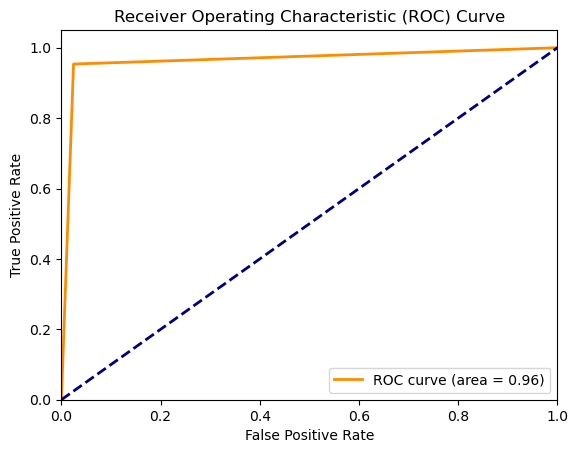

In [23]:
svm_model, svm_accuracy, svm_cm, svm_sensitivity, svm_specificity, svm_precision, svm_f1_score = svm(X_train, y_train, X_test, y_test)


In [24]:
pip install pyrenn


Note: you may need to restart the kernel to use updated packages.


Iteration:  0 		Error:  47004.322218533176 	scale factor:  3.0
Iteration:  1 		Error:  19710.315583927088 	scale factor:  30.0
Iteration:  2 		Error:  14095.950526928991 	scale factor:  30.0
Iteration:  3 		Error:  11159.518022063396 	scale factor:  30.0
Iteration:  4 		Error:  9903.306547271686 	scale factor:  30.0
Iteration:  5 		Error:  9046.681253697629 	scale factor:  30.0
Iteration:  6 		Error:  8261.342486993955 	scale factor:  30.0
Iteration:  7 		Error:  7543.147825931838 	scale factor:  30.0
Iteration:  8 		Error:  6899.485902130946 	scale factor:  30.0
Iteration:  9 		Error:  6349.970546231614 	scale factor:  30.0
Iteration:  10 		Error:  5854.362263021787 	scale factor:  30.0
Iteration:  11 		Error:  5565.011603041336 	scale factor:  30.0
Iteration:  12 		Error:  5321.584907588974 	scale factor:  30.0
Iteration:  13 		Error:  5148.708202127375 	scale factor:  30.0
Iteration:  14 		Error:  4980.3710489005025 	scale factor:  30.0
Iteration:  15 		Error:  4717.488042915455 	sc

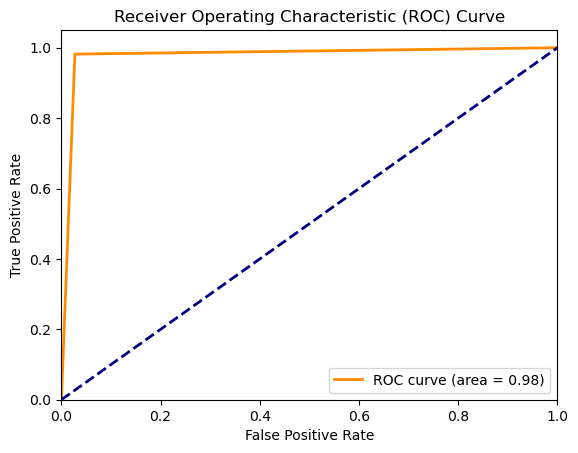

In [25]:
import pyrenn as pr


X = df.drop("label", axis=1)
y = df["label"]

X = X.values.astype(float)
y = y.values.astype(float)

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.3, 
    random_state=42
)


n_features = X_train.shape[1]

net = pr.CreateNN([n_features, 10, 1])

# Train with Levenberg-Marquardt
# k_max: maximum training iterations
# E_stop: training stops if MSE < E_stop
net = pr.train_LM(
    X_train.T,      # training inputs
    y_train.reshape(1, -1),      # training targets
    net, 
    k_max=500,      # max epochs (increase if needed)
    E_stop=0.5,    # stop if error below this
    verbose=True    # print training progress
)


# 8) Prediction on test set
y_pred_test = pr.NNOut(X_test.T, net)

# Threshold at 0.5 for binary classification
y_pred_test_bin = (y_pred_test >= 0.5).astype(int).flatten()
y_test_bin      = y_test.T.flatten().astype(int)

# 9) Evaluate accuracy
accuracy_lm = np.mean(y_pred_test_bin == y_test_bin)
print(f"LM ANN Test Accuracy: {accuracy_lm*100:.2f}%")

# 10) Confusion matrix
cm = confusion_matrix(y_test_bin, y_pred_test_bin)

fpr, tpr, _ = roc_curve(y_test, y_pred_test_bin)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [26]:
tn, fp, fn, tp = cm.ravel()
Se = tp / (tp + fn) * 100  # Sensitivity
Sp = tn / (tn + fp) * 100  # Specificity
Pr = tp / (tp + fp) * 100  # Precision
Fsc = 2 * (Pr * Se) / (Pr + Se)  # F1-Score

print(f"Sensitivity (Se): {Se:.2f}%")
print(f"Specificity (Sp): {Sp:.2f}%")
print(f"Precision (Pr): {Pr:.2f}%")
print(f"F1-Score (Fsc): {Fsc:.2f}%")

Sensitivity (Se): 98.19%
Specificity (Sp): 97.28%
Precision (Pr): 95.84%
F1-Score (Fsc): 97.00%


NCA

Top Features based on NCA Weights:
      Feature    Weight
2         dst  0.213136
13   tx_bytes  0.205444
5         dur  0.201106
0      switch  0.188855
15    tx_kbps  0.185437
1         src  0.184821
14   rx_bytes  0.180259
17   tot_kbps  0.175046
10   Pairflow  0.170570
9   packetins  0.162061
16    rx_kbps  0.154947
11   Protocol  0.139933
12    port_no  0.137038
4   bytecount  0.130524
6    dur_nsec  0.118259
8       flows  0.117286
7     tot_dur  0.112487
3    pktcount  0.093418


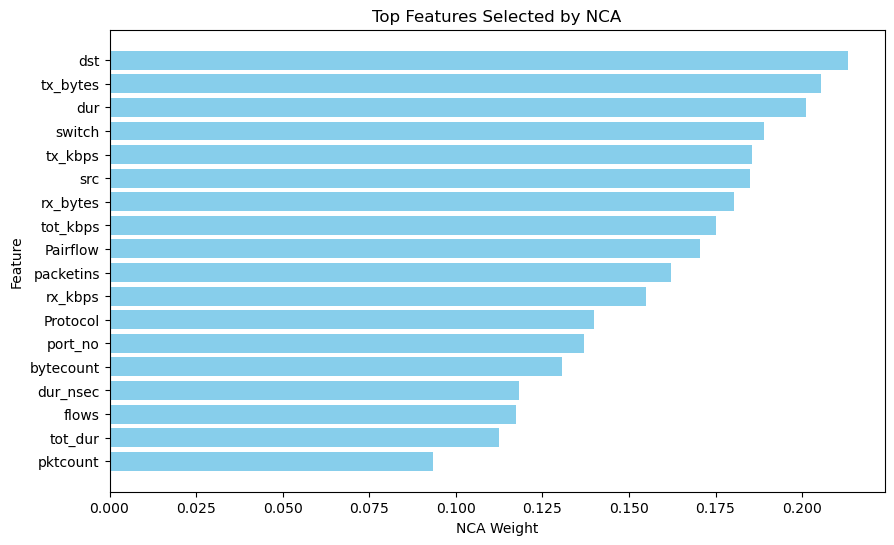

In [27]:
import numpy as np
import math

class NCA_from_scratch:
    def __init__(self,
                 n_components=None,
                 n_epochs=5,
                 batch_size=10,
                 lr=1e-2,
                 reg_lambda=0.0,
                 random_state=42):
        self.n_components = n_components
        self.n_epochs = n_epochs
        self.batch_size = batch_size
        self.lr = lr
        self.reg_lambda = reg_lambda
        self.random_state = random_state
        self.A_ = None  # Learned projection matrix

    def fit(self, X, y):
     
        np.random.seed(self.random_state)

        n_samples, n_features = X.shape
        if self.n_components is None:
            self.n_components = n_features

        # Initialize the transformation matrix A
        # We use a small random initialization around 0
        self.A_ = 0.01 * np.random.randn(self.n_components, n_features)

        # Prepare indices for mini-batch
        indices = np.arange(n_samples)

        for epoch in range(self.n_epochs):
            np.random.shuffle(indices)
            num_batches = math.ceil(n_samples / self.batch_size)

            for b in range(num_batches):
                start = b * self.batch_size
                end = min(start + self.batch_size, n_samples)
                batch_idx = indices[start:end]

                Xb = X[batch_idx]      # (bs, n_features)
                yb = y[batch_idx]      # (bs,)
                bs = Xb.shape[0]

                # Forward: transform Xb -> Zb
                Zb = Xb.dot(self.A_.T)  # (bs, n_components)

                # Compute pairwise distances
                D = self._pairwise_distances(Zb)

                # Probability matrix P
                P = np.zeros((bs, bs), dtype=np.float64)
                for i in range(bs):
                    mask = np.ones(bs, dtype=bool)
                    mask[i] = False
                    row = self._softmax_stable(D[i], mask=mask)
                    P[i, :] = row

                # Gradient wrt Zb
                grad_z = np.zeros_like(Zb)  # (bs, n_components)

                for i in range(bs):
                    # same-label mask
                    same_label_mask = (yb == yb[i]) & (np.arange(bs) != i)

                    # We'll accumulate gradients in g_i
                    g_i = np.zeros(self.n_components)

                    # z_mean_i = Σ_k [p_{k|i} * Zb[k]]
                    z_mean_i = np.sum(Zb * P[i, :][:, None], axis=0)

                    for j in range(bs):
                        if j == i:
                            continue
                        if same_label_mask[j]:
                            p_ji = P[i, j]
                            diff_ij = Zb[i] - Zb[j]
                            # gradient from p_{j|i}
                            g_i += p_ji * (diff_ij - (Zb[i] - z_mean_i))

                    g_i *= -2.0
                    grad_z[i] = g_i

                # Convert grad_z to grad_A
                grad_A = np.zeros_like(self.A_)  # (n_components, n_features)
                for i in range(bs):
                    grad_A += np.outer(grad_z[i], Xb[i])

                # Average the gradient over the batch
                grad_A /= bs

                # Add L2 regularization term: d/dA of (0.5 * reg_lambda * ||A||^2) = reg_lambda * A
                if self.reg_lambda > 0.0:
                    grad_A += self.reg_lambda * self.A_

                # Gradient step
                self.A_ -= self.lr * grad_A

        return self

    def fit_transform(self, X, y):
        """
        Fit the model, then return the transformed data.

        Parameters
        ----------
        X : ndarray of shape (n_samples, n_features)
        y : ndarray of shape (n_samples,)

        Returns
        -------
        Z : ndarray of shape (n_samples, n_components)
            Transformed data.
        """
        self.fit(X, y)
        return self.transform(X)

    def transform(self, X):
        """
        Transform the data X into the learned NCA space.

        Parameters
        ----------
        X : ndarray of shape (n_samples, n_features)

        Returns
        -------
        Z : ndarray of shape (n_samples, n_components)
        """
        return X.dot(self.A_.T)

    @staticmethod
    def _pairwise_distances(Z):
        """
        Compute pairwise squared distances among rows of Z.
        Z is (bs, n_components). Returns (bs, bs) with D[i,j] = ||Z[i]-Z[j]||^2.
        """
        diff = Z[:, np.newaxis, :] - Z[np.newaxis, :, :]
        D = np.sum(diff**2, axis=2)
        return D

    @staticmethod
    def _softmax_stable(x, mask=None):
        """
        Stable softmax over x (1D), ignoring masked indices if provided.
        Using exp(-x - max_shift) to reduce numerical issues.
        """
        if mask is not None:
            valid_x = x[mask]
            if len(valid_x) == 0:
                return np.zeros_like(x)
            # Shift by the min or max of valid_x to improve stability
            # We'll use the maximum of -valid_x -> same as minimum of valid_x
            m = valid_x.min()
            exps = np.exp(-(valid_x - m))
            sum_exps = np.sum(exps)
            out = np.zeros_like(x)
            if sum_exps > 0:
                out[mask] = exps / sum_exps
            return out
        else:
            # If no mask, do full vector
            m = x.min()
            exps = np.exp(-(x - m))
            sum_exps = np.sum(exps)
            if sum_exps == 0:
                return np.zeros_like(x)
            return exps / sum_exps


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 1) Load the dataset (CSV assumed)
df2 = dataset.copy()

df["src"] = df["src"].astype("category").cat.codes
df["dst"] = df["dst"].astype("category").cat.codes
df["Protocol"] = df["Protocol"].astype("category").cat.codes

drop_cols = ["label"]  
X = df.drop(columns=drop_cols)
y = df["label"]

# 4) Train-test split
X_array = X.values
y_array = y.values

# Now do train_test_split on the arrays
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_array,
    y_array,
    test_size=0.3,
    random_state=42
)


from sklearn.impute import SimpleImputer

# 5) Handle missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# 6) Scale the data (important for NCA, which uses distance-based calculations)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# 6) Apply NCA_from_scratch
best_lr = None
best_rank = float('inf')

nca = NCA_from_scratch(
    n_components=22,
    n_epochs=5,
    batch_size=10,
    lr=1e-3,
    random_state=42
)

# Fit and transform
X_train_nca = nca.fit_transform(X_train_scaled, y_train)
X_test_nca = nca.transform(X_test_scaled)

# Extract the NCA weights
nca_weights = nca.A_

# Summation of absolute values across the rows
feature_weights = np.sum(np.abs(nca_weights), axis=0)

# Associate those weights with feature names
feature_names = X.columns
weights_df = pd.DataFrame({'Feature': feature_names, 'Weight': feature_weights})

# Sort by descending weights
weights_df = weights_df.sort_values(by='Weight', ascending=False)

# Find the rank of 'src' feature
print("Top Features based on NCA Weights:")
print(weights_df.head(60))

# 6) Plot the top 20 features as a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(weights_df['Feature'][:20], weights_df['Weight'][:20], color='skyblue')
plt.xlabel('NCA Weight')
plt.ylabel('Feature')
plt.title('Top Features Selected by NCA')
plt.gca().invert_yaxis()  # so the highest weight appears at the top
plt.show()


In [28]:
# Select the first 8 weights from nca_weights
selected_weights = nca_weights[:8, :]

# Transform the training and testing data using the selected weights
X_train_selected = X_train_scaled.dot(selected_weights.T)
X_test_selected = X_test_scaled.dot(selected_weights.T)

# Train and Evaluate Models using the selected 8 features
imputer = SimpleImputer(strategy='mean')

scaler = StandardScaler()
X_train_selected = scaler.fit_transform(X_train_selected)
X_test_selected = scaler.fit_transform(X_test_selected)

# k = 1, Euclidean distance
# BoxConstraint = 1 => C = 1 in sklearn
# kernel scale = 0.9 => gamma = 1/(2*(0.9^2)) 
gamma_value = 1.0 / (2.0 * (0.9**2))



kNN Accuracy (k=1, Euclidean): 94.66%
kNN Confusion Matrix:
[[18294   818]
 [  853 11339]]
Sensitivity (Se): 93.00%
Specificity (Sp): 95.72%
Precision (Pr): 93.27%
F1-Score (Fsc): 93.14%


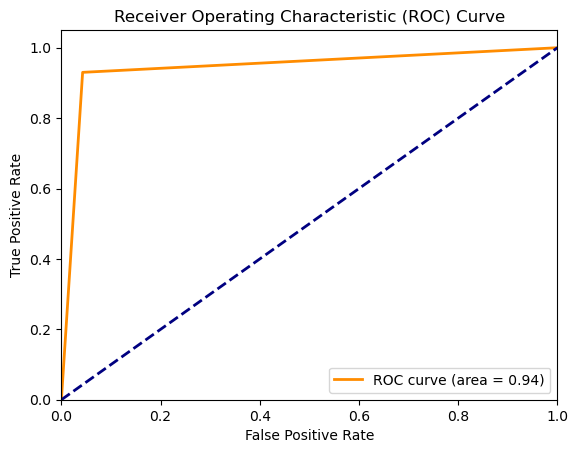

In [29]:
knn_model_selected, knn_accuracy_selected, knn_cm_selected, knn_sensitivity_selected, knn_specificity_selected, knn_precision_selected, knn_f1_score_selected = knn(X_train_selected, y_train, X_test_selected, y_test)

Decision Tree Accuracy (Gini): 86.54%
Sensitivity (Se): 82.60%
Specificity (Sp): 89.05%
Precision (Pr): 82.80%
F1-Score (Fsc): 82.70%


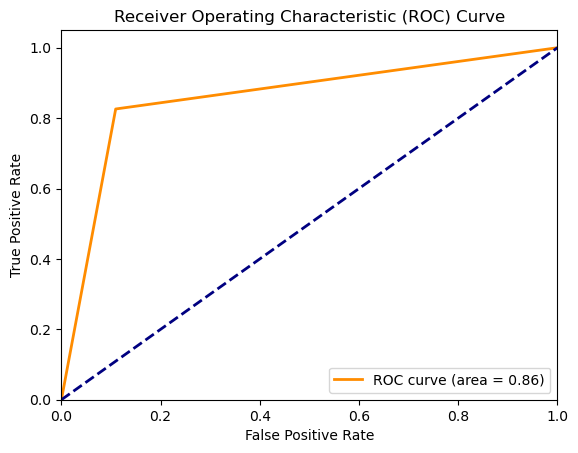

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix



# Example usage:
dt_model, dt_accuracy, dt_cm, dt_sensitivity, dt_specificity, dt_precision, dt_f1_score = dt(X_train_selected, y_train, X_test_selected, y_test)


starting
SVM Accuracy (RBF, BoxConstraint=1, KernelScale=0.9): 89.62%
Sensitivity (Se): 84.31%
Specificity (Sp): 93.01%
Precision (Pr): 88.50%
F1-Score (Fsc): 86.35%


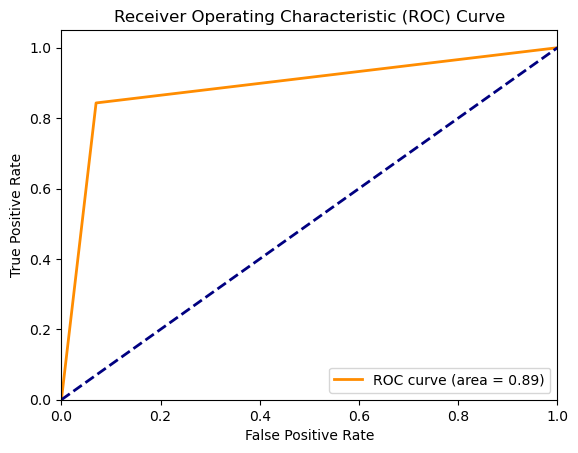

In [31]:
svm_model_selected, svm_accuracy_selected, svm_cm_selected, svm_sensitivity_selected, svm_specificity_selected, svm_precision_selected, svm_f1_score_selected = svm(X_train_selected, y_train, X_test_selected, y_test)

do

Iteration:  0 		Error:  23625.527203002355 	scale factor:  3.0
Iteration:  1 		Error:  18314.28959246459 	scale factor:  3.0
Iteration:  2 		Error:  17271.53208826495 	scale factor:  30.0
Iteration:  3 		Error:  17072.18797375498 	scale factor:  30.0
Iteration:  4 		Error:  16867.957319098423 	scale factor:  30.0
Iteration:  5 		Error:  16280.369514442162 	scale factor:  30.0
Iteration:  6 		Error:  16126.33629919738 	scale factor:  3.0
Iteration:  7 		Error:  15109.515766786895 	scale factor:  3.0
Iteration:  8 		Error:  14796.234333121865 	scale factor:  3.0
Iteration:  9 		Error:  14350.025826305227 	scale factor:  30.0
Iteration:  10 		Error:  14054.24640657159 	scale factor:  3.0
Iteration:  11 		Error:  13788.045639536764 	scale factor:  3.0
Iteration:  12 		Error:  13615.74067941969 	scale factor:  3.0
Iteration:  13 		Error:  13512.881393339616 	scale factor:  3.0
Iteration:  14 		Error:  13428.806367187433 	scale factor:  3.0
Iteration:  15 		Error:  13310.712794493993 	scale 

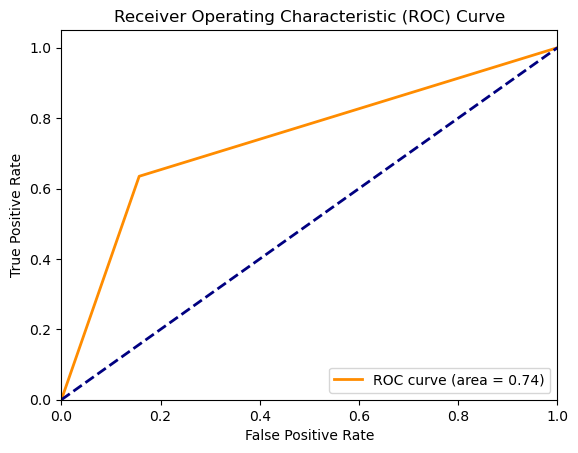

In [32]:
import pyrenn as pr



n_features = X_train_selected.shape[1]

net = pr.CreateNN([n_features, 10, 1])

# Train with Levenberg-Marquardt
# k_max: maximum training iterations
# E_stop: training stops if MSE < E_stop
net = pr.train_LM(
    X_train_selected.T,      # training inputs
    y_train.reshape(1, -1),      # training targets
    net, 
    k_max=500,      # max epochs (increase if needed)
    E_stop=0.5,    # stop if error below this
    verbose=True    # print training progress
)


# 8) Prediction on test set
y_pred_test = pr.NNOut(X_test_selected.T, net)

# Threshold at 0.5 for binary classification
y_pred_test_bin = (y_pred_test >= 0.5).astype(int).flatten()
y_test_bin      = y_test.T.flatten().astype(int)

# 9) Evaluate accuracy
accuracy_lm = np.mean(y_pred_test_bin == y_test_bin)
print(f"LM ANN Test Accuracy: {accuracy_lm*100:.2f}%")

# 10) Confusion matrix
cm = confusion_matrix(y_test_bin, y_pred_test_bin)
fpr, tpr, _ = roc_curve(y_test, y_pred_test_bin)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [33]:
import numpy as np

cm = np.array([[16115, 2997], [4453, 7739]])

# Extracting True Negatives (TN), False Positives (FP), False Negatives (FN), and True Positives (TP)
TN, FP, FN, TP = cm.ravel()

# Calculating metrics
Se = TP / (TP + FN) * 100  # Sensitivity (Recall)
Sp = TN / (TN + FP) * 100  # Specificity
Pr = TP / (TP + FP) * 100  # Precision
Fsc = 2 * (Pr * Se) / (Pr + Se)  # F1-Score
ACC = (TP + TN) / (TP + TN + FP + FN) * 100  # Accuracy

print(f"Sensitivity (Se): {Se:.2f}%")
print(f"Specificity (Sp): {Sp:.2f}%")
print(f"Precision (Pr): {Pr:.2f}%")
print(f"F1-Score (Fsc): {Fsc:.2f}%")
print(f"Accuracy (ACC): {ACC:.2f}%")

Sensitivity (Se): 63.48%
Specificity (Sp): 84.32%
Precision (Pr): 72.08%
F1-Score (Fsc): 67.51%
Accuracy (ACC): 76.20%


In [34]:
df1 = dataset.copy()
df_selected = df1[['src', 'pktcount', 'dst', 'byteperflow', 'pktperflow', 'pktrate', 'tot_kbps', 'rx_kbps', 'flows', 'bytecount', 'dt', 'Protocol', 'dur', 'tot_dur', 'label']]
df_selected.head

# df = df.drop(columns=["pktrate", "byteperflow", "pktperflow"])

df_selected['src'] = df_selected['src'].astype('category').cat.codes
df_selected['dst'] = df_selected['dst'].astype('category').cat.codes
df_selected['Protocol'] = df_selected['Protocol'].astype('category').cat.codes

# df_selected = df_selected.drop(columns=['dt'])
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

# Apply the imputer to the dataframe
df_selected = pd.DataFrame(imputer.fit_transform(df_selected), columns=df_selected.columns)

# Normalize numerical features
X = df_selected.drop(['label'], axis=1)
y = df_selected.label

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)




C:\Users\Daniyal\AppData\Local\Temp\ipykernel_12172\158182313.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['src'] = df_selected['src'].astype('category').cat.codes
C:\Users\Daniyal\AppData\Local\Temp\ipykernel_12172\158182313.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['dst'] = df_selected['dst'].astype('category').cat.codes
C:\Users\Daniyal\AppData\Local\Temp\ipykernel_12172\158182313.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

kNN Accuracy (k=1, Euclidean): 99.28%
kNN Confusion Matrix:
[[19005   107]
 [  117 12075]]
Sensitivity (Se): 99.04%
Specificity (Sp): 99.44%
Precision (Pr): 99.12%
F1-Score (Fsc): 99.08%


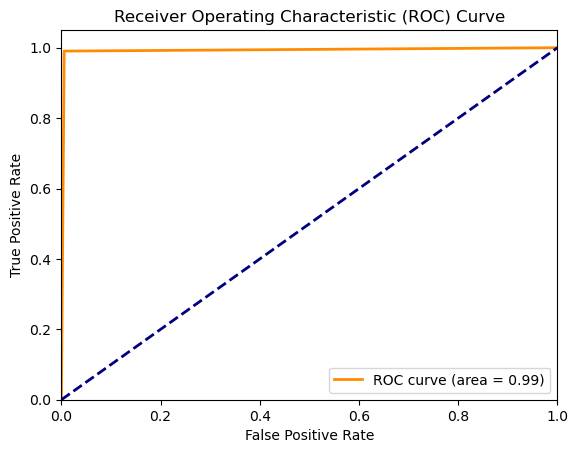

In [35]:
knn_model, knn_accuracy, knn_cm, knn_sensitivity, knn_specificity, knn_precision, knn_f1_score = knn(X_train, y_train, X_test, y_test)

dt

Decision Tree Accuracy (Gini): 100.00%
Sensitivity (Se): 100.00%
Specificity (Sp): 100.00%
Precision (Pr): 100.00%
F1-Score (Fsc): 100.00%


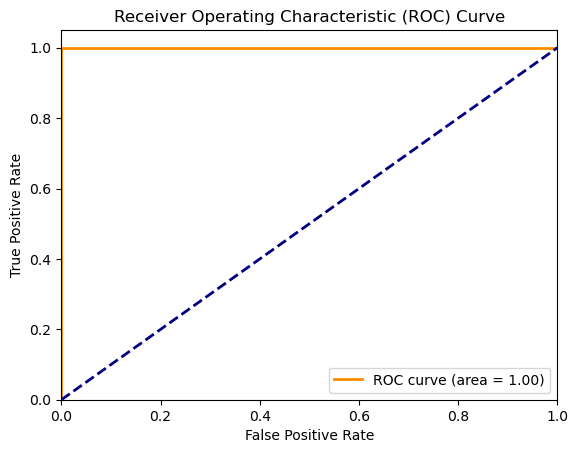

In [36]:
dt_model, dt_accuracy, dt_cm, dt_sensitivity, dt_specificity, dt_precision, dt_f1_score = dt(X_train, y_train, X_test, y_test)

svm

starting
SVM Accuracy (RBF, BoxConstraint=1, KernelScale=0.9): 98.28%
Sensitivity (Se): 97.92%
Specificity (Sp): 98.51%
Precision (Pr): 97.68%
F1-Score (Fsc): 97.80%


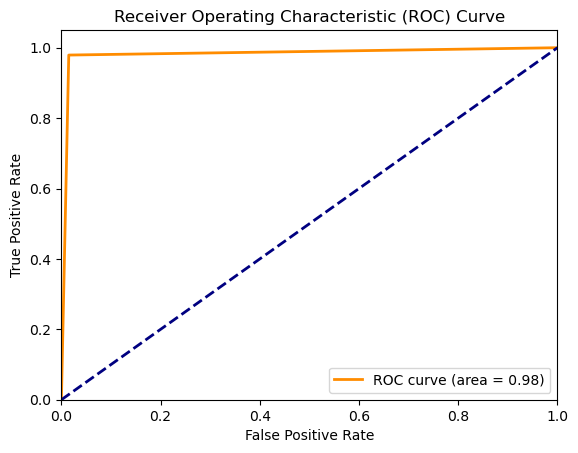

In [37]:
svm_model, svm_accuracy, svm_cm, svm_sensitivity, svm_specificity, svm_precision, svm_f1_score = svm(X_train, y_train, X_test, y_test)

do

Iteration:  0 		Error:  47762.917518528964 	scale factor:  3.0
Iteration:  1 		Error:  18684.755958226127 	scale factor:  30.0
Iteration:  2 		Error:  14878.406367323467 	scale factor:  30.0
Iteration:  3 		Error:  9391.309338801455 	scale factor:  30.0
Iteration:  4 		Error:  8064.431403195357 	scale factor:  30.0
Iteration:  5 		Error:  6268.001333440101 	scale factor:  30.0
Iteration:  6 		Error:  5691.163416208552 	scale factor:  30.0
Iteration:  7 		Error:  5359.1530585780365 	scale factor:  30.0
Iteration:  8 		Error:  5108.758646039523 	scale factor:  30.0
Iteration:  9 		Error:  4936.144265066756 	scale factor:  30.0
Iteration:  10 		Error:  4817.116931385064 	scale factor:  30.0
Iteration:  11 		Error:  4725.091733934219 	scale factor:  30.0
Iteration:  12 		Error:  4649.612688900217 	scale factor:  30.0
Iteration:  13 		Error:  4585.263373486573 	scale factor:  30.0
Iteration:  14 		Error:  4575.959281168914 	scale factor:  3.0
Iteration:  15 		Error:  4329.753326945717 	scal

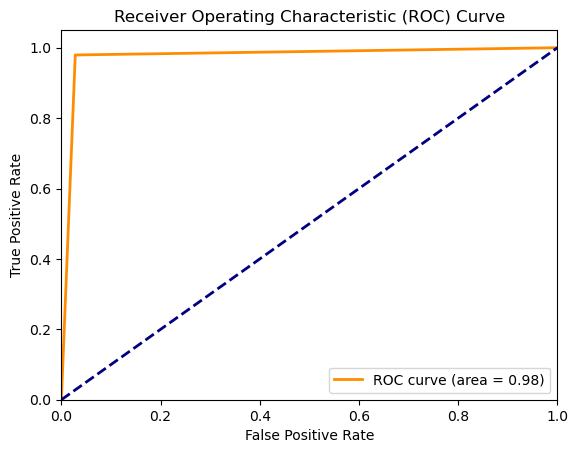

In [38]:
import pyrenn as pr



n_features = X_train.shape[1]

net = pr.CreateNN([n_features, 10, 1])

# Convert y_train and y_test to numpy arrays
y_train_np = y_train.values
y_test_np = y_test.values

# Train with Levenberg-Marquardt
# k_max: maximum training iterations
# E_stop: training stops if MSE < E_stop
net = pr.train_LM(
    X_train.T,      # training inputs
    y_train_np.reshape(1, -1),      # training targets
    net, 
    k_max=500,      # max epochs (increase if needed)
    E_stop=0.5,    # stop if error below this
    verbose=True    # print training progress
)


# 8) Prediction on test set
y_pred_test = pr.NNOut(X_test.T, net)

# Threshold at 0.5 for binary classification
y_pred_test_bin = (y_pred_test >= 0.5).astype(int).flatten()
y_test_bin      = y_test_np.flatten().astype(int)

fpr, tpr, _ = roc_curve(y_test, y_pred_test_bin)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [39]:
import numpy as np
from sklearn.metrics import confusion_matrix

# 9) Evaluate accuracy
accuracy_lm = np.mean(y_pred_test_bin == y_test_bin)
print(f"LM ANN Test Accuracy: {accuracy_lm*100:.2f}%")

# 10) Confusion matrix
cm = confusion_matrix(y_test_bin, y_pred_test_bin)
print("Confusion Matrix:\n", cm)
tn, fp, fn, tp = cm.ravel()
Se = tp / (tp + fn) * 100  # Sensitivity
Sp = tn / (tn + fp) * 100  # Specificity
Pr = tp / (tp + fp) * 100  # Precision
Fsc = 2 * (Pr * Se) / (Pr + Se)  # F1-Score

print(f"Sensitivity (Se): {Se:.2f}%")
print(f"Specificity (Sp): {Sp:.2f}%")
print(f"Precision (Pr): {Pr:.2f}%")
print(f"F1-Score (Fsc): {Fsc:.2f}%")


LM ANN Test Accuracy: 97.49%
Confusion Matrix:
 [[18578   534]
 [  251 11941]]
Sensitivity (Se): 97.94%
Specificity (Sp): 97.21%
Precision (Pr): 95.72%
F1-Score (Fsc): 96.82%


k-fold cross validation

In [40]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

df1 = dataset.copy()
df_selected = df1[['src', 'pktcount', 'dst', 'byteperflow', 'pktperflow', 'pktrate', 'tot_kbps', 'rx_kbps', 'flows', 'bytecount', 'dt', 'Protocol', 'dur', 'tot_dur', 'label']]
df_selected.head


df_selected['src'] = df_selected['src'].astype('category').cat.codes
df_selected['dst'] = df_selected['dst'].astype('category').cat.codes
df_selected['Protocol'] = df_selected['Protocol'].astype('category').cat.codes


imputer = SimpleImputer(strategy='mean')

# Apply the imputer to the dataframe
df_selected = pd.DataFrame(imputer.fit_transform(df_selected), columns=df_selected.columns)

# Normalize numerical features
X = df_selected.drop(['label'], axis=1)
y = df_selected.label

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

C:\Users\Daniyal\AppData\Local\Temp\ipykernel_12172\1982816124.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['src'] = df_selected['src'].astype('category').cat.codes
C:\Users\Daniyal\AppData\Local\Temp\ipykernel_12172\1982816124.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['dst'] = df_selected['dst'].astype('category').cat.codes
C:\Users\Daniyal\AppData\Local\Temp\ipykernel_12172\1982816124.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

do (separate the svm)

In [41]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

kfold = KFold(n_splits=10, shuffle=True, random_state=42)

def evaluate_model(model, X, y):
    accuracy_scores = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
    specificity_scores = []
    sensitivity_scores = []
    precision_scores = []
    f1_scores = []
    
    for train_idx, test_idx in kfold.split(X):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
        
        model.fit(X_train, y_train)
        
        y_pred = model.predict(X_test)
        
        conf_matrix = confusion_matrix(y_test, y_pred)
        TN, FP, FN, TP = conf_matrix.ravel()
        
        specificity = TN / (TN + FP)
        specificity_scores.append(specificity)
        
        sensitivity = TP / (TP + FN)
        sensitivity_scores.append(sensitivity)
        
        precision = precision_score(y_test, y_pred)
        precision_scores.append(precision)
        
        f1 = f1_score(y_test, y_pred)
        f1_scores.append(f1)
    
    mean_accuracy = accuracy_scores.mean()
    mean_specificity = sum(specificity_scores) / len(specificity_scores)
    mean_sensitivity = sum(sensitivity_scores) / len(sensitivity_scores)
    mean_precision = sum(precision_scores) / len(precision_scores)
    mean_f1 = sum(f1_scores) / len(f1_scores)
    
    return mean_accuracy, mean_specificity, mean_sensitivity, mean_precision, mean_f1

kNN Accuracy (k=1, Euclidean): 99.28%
kNN Confusion Matrix:
[[19005   107]
 [  117 12075]]
Sensitivity (Se): 99.04%
Specificity (Sp): 99.44%
Precision (Pr): 99.12%
F1-Score (Fsc): 99.08%


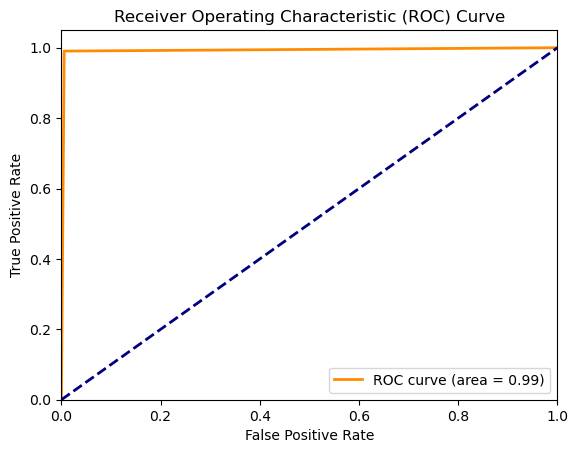

kNN Accuracy (10-Fold CV): 0.9997
kNN Specificity (10-Fold CV): 0.9997
kNN Sensitivity (10-Fold CV): 0.9996
kNN Precision (10-Fold CV): 0.9996
kNN F1-Score (10-Fold CV): 0.9996
--------------------------------------------------
Decision Tree Accuracy (Gini): 100.00%
Sensitivity (Se): 100.00%
Specificity (Sp): 100.00%
Precision (Pr): 100.00%
F1-Score (Fsc): 100.00%


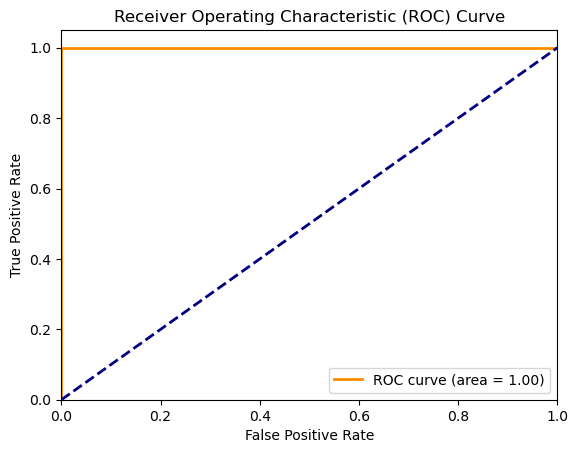

Decision Tree Accuracy (10-Fold CV): 1.0000
Decision Tree Specificity (10-Fold CV): 1.0000
Decision Tree Sensitivity (10-Fold CV): 1.0000
Decision Tree Precision (10-Fold CV): 1.0000
Decision Tree F1-Score (10-Fold CV): 1.0000
--------------------------------------------------


In [42]:
knn_model, knn_accuracy, knn_cm, knn_sensitivity, knn_specificity, knn_precision, knn_f1_score = knn(X_train, y_train, X_test, y_test)
accuracy_knn, specificity_knn, sensitivity_knn, precision_knn, f1_knn = evaluate_model(knn_model, X, y)
print(f"kNN Accuracy (10-Fold CV): {accuracy_knn:.4f}")
print(f"kNN Specificity (10-Fold CV): {specificity_knn:.4f}")
print(f"kNN Sensitivity (10-Fold CV): {sensitivity_knn:.4f}")
print(f"kNN Precision (10-Fold CV): {precision_knn:.4f}")
print(f"kNN F1-Score (10-Fold CV): {f1_knn:.4f}")
print("--------------------------------------------------")

dt_model, dt_accuracy, dt_cm, dt_sensitivity, dt_specificity, dt_precision, dt_f1_score = dt(X_train, y_train, X_test, y_test)
accuracy_dt, specificity_dt, sensitivity_dt, precision_dt, f1_dt = evaluate_model(dt_model, X, y)

print(f"Decision Tree Accuracy (10-Fold CV): {accuracy_dt:.4f}")
print(f"Decision Tree Specificity (10-Fold CV): {specificity_dt:.4f}")
print(f"Decision Tree Sensitivity (10-Fold CV): {sensitivity_dt:.4f}")
print(f"Decision Tree Precision (10-Fold CV): {precision_dt:.4f}")
print(f"Decision Tree F1-Score (10-Fold CV): {f1_dt:.4f}")

In [43]:
def evaluate_model(model, X, y):
    accuracy_scores = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
    specificity_scores = []
    sensitivity_scores = []
    precision_scores = []
    f1_scores = []
    
    for train_idx, test_idx in kfold.split(X):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]
        
        model.fit(X_train, y_train)
        
        y_pred = model.predict(X_test)
        
        conf_matrix = confusion_matrix(y_test, y_pred)
        TN, FP, FN, TP = conf_matrix.ravel()
        
        specificity = TN / (TN + FP)
        specificity_scores.append(specificity)
        
        sensitivity = TP / (TP + FN)
        sensitivity_scores.append(sensitivity)
        
        precision = precision_score(y_test, y_pred)
        precision_scores.append(precision)
        
        f1 = f1_score(y_test, y_pred)
        f1_scores.append(f1)
    
    mean_accuracy = accuracy_scores.mean()
    mean_specificity = sum(specificity_scores) / len(specificity_scores)
    mean_sensitivity = sum(sensitivity_scores) / len(sensitivity_scores)
    mean_precision = sum(precision_scores) / len(precision_scores)
    mean_f1 = sum(f1_scores) / len(f1_scores)
    
    return mean_accuracy, mean_specificity, mean_sensitivity, mean_precision, mean_f1



from sklearn.svm import SVC

gamma_value = 1.0 / (2.0 * (0.9**2))

svm_model = SVC(
    kernel='rbf', 
    C=1.0, 
    gamma=gamma_value, 
    random_state=42
)
print("starting")
    


# svm_model, svm_accuracy, svm_cm, svm_sensitivity, svm_specificity, svm_precision, svm_f1_score = svm(X_train, y_train, X_test, y_test)
accuracy_svm, specificity_svm, sensitivity_svm, precision_svm, f1_svm = evaluate_model(svm_model, X_scaled, y)
print(f"SVM Accuracy (10-Fold CV): {accuracy_svm:.4f}")
print(f"SVM Specificity (10-Fold CV): {specificity_svm:.4f}")
print(f"SVM Sensitivity (10-Fold CV): {sensitivity_svm:.4f}")
print(f"SVM Precision (10-Fold CV): {precision_svm:.4f}")
print(f"SVM F1-Score (10-Fold CV): {f1_svm:.4f}")

starting
SVM Accuracy (10-Fold CV): 0.9858
SVM Specificity (10-Fold CV): 0.9879
SVM Sensitivity (10-Fold CV): 0.9825
SVM Precision (10-Fold CV): 0.9812
SVM F1-Score (10-Fold CV): 0.9818
--------------------------------------------------


do

In [44]:
def ANN(X_train, y_train, X_test, y_test):
    n_features = X_train.shape[1]

    net = pr.CreateNN([n_features, 10, 1])

    y_train_np = y_train.values
    y_test_np = y_test.values
    # Train with Levenberg-Marquardt
    # k_max: maximum training iterations
    # E_stop: training stops if MSE < E_stop
    net = pr.train_LM(
        X_train.T,      # training inputs
        y_train_np.reshape(1, -1),      # training targets
        net, 
        k_max=500,      # max epochs (increase if needed)
        E_stop=0.5,    # stop if error below this
        verbose=True    # print training progress
    )

    # Prediction on test set
    y_pred_test = pr.NNOut(X_test.T, net)

    # Threshold at 0.5 for binary classification
    y_pred_test_bin = (y_pred_test >= 0.5).astype(int).flatten()
    y_test_bin = y_test_np.T.flatten().astype(int)

    # Evaluate accuracy
    accuracy_lm = np.mean(y_pred_test_bin == y_test_bin)
    print(f"LM ANN Test Accuracy: {accuracy_lm*100:.2f}%")

    # Confusion matrix
    cm = confusion_matrix(y_test_bin, y_pred_test_bin)
    fpr, tpr, _ = roc_curve(y_test, y_pred_test_bin)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

    return net, accuracy_lm, cm



In [45]:
def evaluate_model(model, X, y):
    accuracy_scores = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
    specificity_scores = []
    sensitivity_scores = []
    precision_scores = []
    f1_scores = []
    
    for train_idx, test_idx in kfold.split(X):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]
        
        model.fit(X_train, y_train)
        
        y_pred = model.predict(X_test)
        
        conf_matrix = confusion_matrix(y_test, y_pred)
        TN, FP, FN, TP = conf_matrix.ravel()
        
        specificity = TN / (TN + FP)
        specificity_scores.append(specificity)
        
        sensitivity = TP / (TP + FN)
        sensitivity_scores.append(sensitivity)
        
        precision = precision_score(y_test, y_pred)
        precision_scores.append(precision)
        
        f1 = f1_score(y_test, y_pred)
        f1_scores.append(f1)
    
    mean_accuracy = accuracy_scores.mean()
    mean_specificity = sum(specificity_scores) / len(specificity_scores)
    mean_sensitivity = sum(sensitivity_scores) / len(sensitivity_scores)
    mean_precision = sum(precision_scores) / len(precision_scores)
    mean_f1 = sum(f1_scores) / len(f1_scores)
    
    return mean_accuracy, mean_specificity, mean_sensitivity, mean_precision, mean_f1


class ANNWrapper:
    def __init__(self, n_features):
        self.n_features = n_features
        self.net = pr.CreateNN([n_features, 10, 1])

    def fit(self, X_train, y_train):
        X_train_np = X_train.values if isinstance(X_train, pd.DataFrame) else X_train
        y_train_np = y_train.values if isinstance(y_train, pd.Series) else y_train
        self.net = pr.train_LM(
            X_train_np.T,      # training inputs
            y_train_np.reshape(1, -1),      # training targets
            self.net, 
            k_max=10,      # max epochs (increase if needed)
            E_stop=0.5,    # stop if error below this
            verbose=True    # print training progress
        )

    def predict(self, X_test):
        X_test_np = X_test.values if isinstance(X_test, pd.DataFrame) else X_test
        y_pred_test = pr.NNOut(X_test_np.T, self.net)
        y_pred_test_bin = (y_pred_test >= 0.5).astype(int).flatten()
        return y_pred_test_bin

    def get_params(self, deep=True):
        return {"n_features": self.n_features}

    def set_params(self, **params):
        for key, value in params.items():
            setattr(self, key, value)
        return self

ann_model = ANNWrapper(n_features=X_train.shape[1])
ann_model.fit(X_train, y_train)
accuracy_ann, specificity_ann, sensitivity_ann, precision_ann, f1_ann = evaluate_model(ann_model, X_scaled, y)
print(f"ANN Accuracy (10-Fold CV): {accuracy_ann:.4f}")
print(f"ANN Specificity (10-Fold CV): {specificity_ann:.4f}")
print(f"ANN Sensitivity (10-Fold CV): {sensitivity_ann:.4f}")
print(f"ANN Precision (10-Fold CV): {precision_ann:.4f}")
print(f"ANN F1-Score (10-Fold CV): {f1_ann:.4f}")

Iteration:  0 		Error:  22589.38246695495 	scale factor:  3.0
Iteration:  1 		Error:  13687.311642613335 	scale factor:  30.0
Iteration:  2 		Error:  11505.41287587002 	scale factor:  30.0
Iteration:  3 		Error:  9880.99246958059 	scale factor:  30.0
Iteration:  4 		Error:  8345.441861444733 	scale factor:  30.0
Iteration:  5 		Error:  7179.122781081534 	scale factor:  30.0
Iteration:  6 		Error:  6374.704160322735 	scale factor:  30.0
Iteration:  7 		Error:  6104.226049551913 	scale factor:  3.0
Iteration:  8 		Error:  5202.392054877535 	scale factor:  3.0
Iteration:  9 		Error:  4578.293240965115 	scale factor:  3.0
Iteration:  10 		Error:  4288.968067129698 	scale factor:  3.0
Maximum number of iterations reached
Iteration:  0 		Error:  42484.178785682314 	scale factor:  3.0
Iteration:  1 		Error:  22312.61292731548 	scale factor:  30.0
Iteration:  2 		Error:  15799.041484386013 	scale factor:  30.0
Iteration:  3 		Error:  14943.949530879745 	scale factor:  30.0
Iteration:  4 		Erro

بهبود

In [ ]:
from sklearn.ensemble import VotingClassifier

df = dataset.copy()

df["src"] = df["src"].astype("category").cat.codes
df["dst"] = df["dst"].astype("category").cat.codes
df["Protocol"] = df["Protocol"].astype("category").cat.codes

df = df.drop(columns=["pktrate", "byteperflow", "pktperflow", 'dt', 'dur'])


drop_cols = ["label"] 
X = df.drop(columns=drop_cols)
y = df["label"]

X = pd.get_dummies(X)
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [10]:
# Fit the ensemble model on the training data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42
)
# ensemble.fit(X_train, y_train)

# Predict on the test data
# y_pred_ensemble = ensemble.predict(X_test)

# Calculate the accuracy
# ensemble_accuracy = accuracy_score(y_test, y_pred_ensemble)
# print(f"Ensemble Accuracy: {ensemble_accuracy:.4f}")

Ensemble Accuracy: 0.9980
Sensitivity (Se): 99.71%
Specificity (Sp): 99.85%
Precision (Pr): 99.77%
F1-Score (Fsc): 99.74%


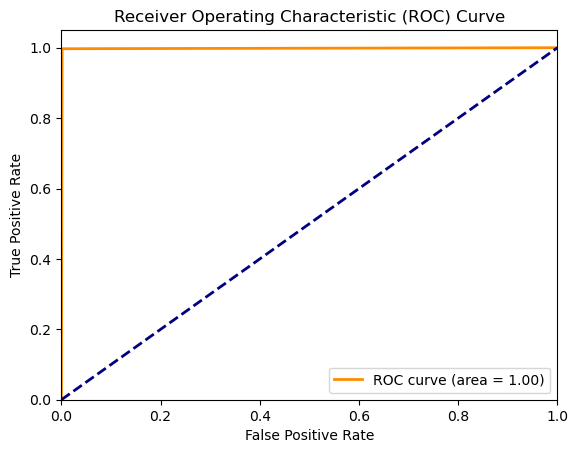

In [70]:
model1 = RandomForestClassifier(
        criterion='gini', 
        random_state=42
    )
 
estimators = []
estimators.append(('rf', model1))


model2 = DecisionTreeClassifier(
        criterion='gini', 
        random_state=42
    )
estimators.append(('dt', model2))


model3 = DecisionTreeClassifier(
        criterion='entropy', 
        random_state=42
    )
estimators.append(('dt2', model3))


model4 = DecisionTreeClassifier(
        criterion='log_loss', 
        random_state=42
    )
estimators.append(('dt3', model4))

model5 = RandomForestClassifier(
        criterion='entropy', 
        random_state=42
    )
estimators.append(('rf2', model5))
 
model6 = RandomForestClassifier(
        criterion='log_loss', 
        random_state=42
    )
estimators.append(('rf3', model6))


# create the ensemble model
ensemble = VotingClassifier(estimators)

ensemble.fit(X_train, y_train)

# Predict on the test data
y_pred_ensemble = ensemble.predict(X_test)

# Calculate the accuracy
ensemble_accuracy = accuracy_score(y_test, y_pred_ensemble)
print(f"Ensemble Accuracy: {ensemble_accuracy:.4f}")

# Confusion Matrix
cm_knn = confusion_matrix(y_test, y_pred_ensemble)

# Sensitivity, Specificity, Precision, F1-Score
tn, fp, fn, tp = cm_knn.ravel()
Se = tp / (tp + fn) * 100  # Sensitivity
Sp = tn / (tn + fp) * 100  # Specificity
Pr = tp / (tp + fp) * 100  # Precision
Fsc = 2 * (Pr * Se) / (Pr + Se)  # F1-Score

print(f"Sensitivity (Se): {Se:.2f}%")
print(f"Specificity (Sp): {Sp:.2f}%")
print(f"Precision (Pr): {Pr:.2f}%")
print(f"F1-Score (Fsc): {Fsc:.2f}%")

    # ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_ensemble)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [75]:
kfold = KFold(n_splits=40, random_state=7 , shuffle=True)
results = cross_val_score(ensemble, X, y, cv=kfold)

In [76]:
print("accuracy:",results.mean())

accuracy: 0.9992333088683111


بهبود2

In [ ]:
from sklearn.ensemble import VotingClassifier

df2 = dataset.copy()
df_selected = df2[['src', 'pktcount', 'dst', 'tot_kbps', 'rx_kbps', 'flows', 'bytecount', 'Protocol', 'tot_dur', 'label']]


drop_cols = ["label"] 
X2 = df.drop(columns=drop_cols)
y2 = df["label"]

X2 = pd.get_dummies(X2)

imputer = SimpleImputer(strategy='mean')
X2 = imputer.fit_transform(X2)


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X2 = scaler.fit_transform(X2)
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X2,
    y2,
    test_size=0.3,
    random_state=42
)


Decision Tree Accuracy (Gini): 100.00%
Sensitivity (Se): 100.00%
Specificity (Sp): 99.99%
Precision (Pr): 99.99%
F1-Score (Fsc): 100.00%


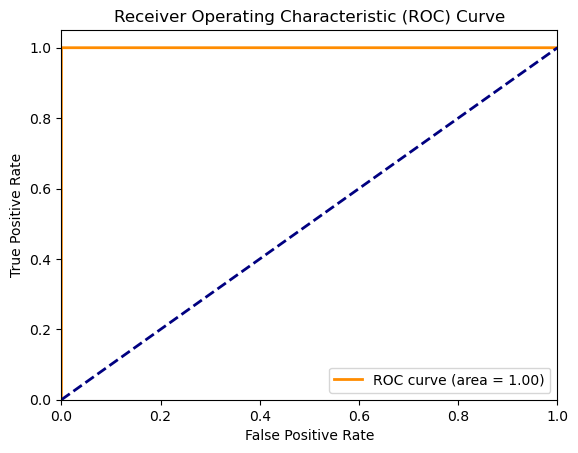

In [44]:
dt_model, dt_accuracy, dt_cm, dt_sensitivity, dt_specificity, dt_precision, dt_f1_score = dt(X_train2, y_train2, X_test2, y_test2)